In [2]:
import seaborn as sns #importing everything that's necessary
import pandas as pd 
import matplotlib.pyplot as plt

#loading 1st df
df1 = pd.read_csv('steps.csv', sep=";")
dfavg = df1.drop("id", axis = 1).mean(axis = 1)
df1["average"]=dfavg
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,average
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [3]:
#loading 2nd df
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
#merging dfs
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier of two dfs
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,average,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,10205.521212,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,5687.423313,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,8301.729730,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3633.200000,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5312.129630,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [45]:
#taking a column I'm going to use for graphs
dfavg = df['average']

#the function that will get rid of 'ugly' data that is probably not real
def above_25000(x):
    if(x > 20000): 
        return float('NaN')
    else: 
        return x
dfavg = dfavg.apply(above_25000)
df
mean_size = dfavg.mean()
median_size = dfavg.median()
avgvar = dfavg.var()
avgstd = dfavg.std()
print(f'The median is: {median_size}')
print(f'The mean is: {mean_size}')
print(f'The variance is: {avgvar}')
print(f'Standard diviation is: {avgstd}')


The median is: 6237.488
The mean is: 6671.5167089754705
The variance is: 8224014.411725026
Standard diviation is: 2867.7542453503625


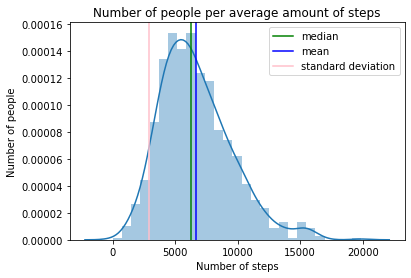

In [44]:
sns.distplot(dfavg, kde=True, vertical = False)
plt.title('Number of people per average amount of steps')
plt.xlabel('Number of steps')
plt.ylabel('Number of people')
plt.axvline(median_size, 0, 100, color='green', label='median') #adding vertical lines that represent median, mean and standard deviation
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.axvline(avgstd, 0, 100, color='pink', label='standard deviation')
plt.legend() #adding legend
plt.show()





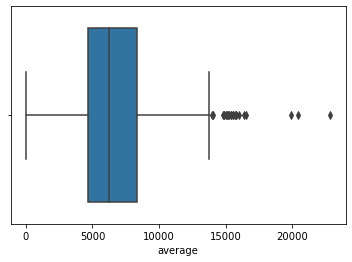

In [24]:
sns.boxplot(dfavg)
plt.show()

We can see in those two graphs that the data makes it right skewed, so that means that the majority of people who contributed to gathering this data make averagely more than 6240.073033707865 steps daily. 